In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline 
%config InlineBackend.figue_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

pd.set_option('display.max_columns', 200)

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
train_data = pd.read_csv('data/features.csv', index_col='match_id')
test_data = pd.read_csv('data/features_test.csv', index_col='match_id')
data = [train_data, test_data]

In [3]:
for dt in data:
    print(f'Shape = {dt.shape}')
    display(dt.head())
#     display(dt.info(max_cols=110)) # All int or float
    display(dt.describe())

    print('Неполные данные:\n')
    count = dt.count().max()
    print(f'Count = {count}\n')
    incomplete = dt.count()[dt.count() != dt.count().max()]
    for col, cnt in zip(incomplete.index, incomplete):
        print(f'{col:27} : {cnt} ({round(1 - cnt / count, 2) * 100}% incomplete)')
    print(''.join(['\n', '=' * 30, '\n']))

Shape = (97230, 108)


,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,2449,0,4,1974,3,63


,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,77677.000000,77677.000000,77677.000000,53243.000000,81539.000000,96538.000000,69751.000000,97230.000000,97230.000000,97230.000000,97230.000000,95394.000000,81087.000000,96554.000000,71132.000000,97230.000000,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,52.183452,3.364661,1189.223676,1107.863993,10.471747,0.348709,0.363550,8.275584,52.710491,3.353924,1182.879965,1099.643742,10.333004,0.342723,0.357338,8.273527,52.648092,3.308896,1159.088481,1082.090240,9.981909,0.337746,0.357307,8.275049,52.625630,3.304237,1158.586167,1082.057061,9.995351,0.337262,0.352782,8.288491,51.990106,3.461123,1238.855765,1151.018184,11.253841,0.372262,0.344091,8.296380,52.708547,3.388933,1199.858809,1108.633436,10.460424,0.356238,0.347012,8.310419,52.755137,3.378638,1193.554438,1103.273702,10.386918,0.353533,0.347732,8.305420,52.922421,3.337725,1171.952155,1088.711653,10.035349,0.354952,0.341860,8.319665,53.059694,3.345274,1177.395351,1089.558850,10.053739,0.356063,0.342538,8.323048,97.688029,0.521815,4.593483,4.383224,126.800255,-80.059510,215.987126,2.994775,3.312527,2.431719,0.716250,-6.875747,127.215028,-80.191893,214.870536,2.965566,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,32.674077,1.097536,555.363510,458.001007,8.972073,0.654060,0.624236,2.433864,32.560923,1.092126,554.899600,454.727127,8.950871,0.647774,0.618071,2.440139,32.670519,1.092502,550.937530,450.353291

Неполные данные:

Count = 97230

first_blood_time            : 77677 (20.0% incomplete)
first_blood_team            : 77677 (20.0% incomplete)
first_blood_player1         : 77677 (20.0% incomplete)
first_blood_player2         : 53243 (45.0% incomplete)
radiant_bottle_time         : 81539 (16.0% incomplete)
radiant_courier_time        : 96538 (1.0% incomplete)
radiant_flying_courier_time : 69751 (28.000000000000004% incomplete)
radiant_first_ward_time     : 95394 (2.0% incomplete)
dire_bottle_time            : 81087 (17.0% incomplete)
dire_courier_time           : 96554 (1.0% incomplete)
dire_flying_courier_time    : 71132 (27.0% incomplete)
dire_first_ward_time        : 95404 (2.0% incomplete)


Shape = (17177, 102)


,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,102,3,1183,963,9,0,2,9,52,5,2289,2043,20,2,0,6,53,3,917,1006,14,0,0,6,57,3,1344,933,3,0,0,9,26,3,1122,949,5,1,0,10,89,4,1847,1866,25,1,0,10,20,3,841,1015,2,1,0,9,29,3,1091,918,6,0,1,8,39,5,1674,1048,12,0,1,7,1.0,0.0,2.0,NaN,72.0,-82.0,NaN,2,2,3,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,6,4,1194,1386,21,0,0,7,65,4,1374,1064,13,0,1,8,92,2,774,737,0,1,0,8,43,5,2254,1787,24,0,0,6,54,3,909,970,16,0,0,5,34,4,1543,929,10,0,0,7,93,4,1485,1389,19,0,0,14,99,3,1075,718,3,0,1,7,5,4,1130,994,1,1,0,10,84.0,1.0,9.0,NaN,138.0,-82.0,233.0,2,6,2,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,26,2,421,569,3,0,0,6,29,3,960,896,3,1,2,6,11,5,1877,1511,23,0,0,8,41,4,1581,1593,26,0,0,4,91,3,687,675,1,0,0,1,22,2,515,793,4,0,0,8,10,3,964,1022,12,0,0,8,49,5,2434,1917,22,0,0,9,54,4,1372,2005,24,2,1,11,168.0,1.0,9.0,NaN,33.0,-88.0,NaN,5,4,3,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,91,2,672,901,6,0,0,8,74,5,2141,1626,28,0,0,7,52,4,1579,2169,28,2,0,7,2,5,1960,1668,27,0,0,8,110,4,1255,704,5,0,1,6,25,2,490,648,1,0,1,9,77,4,1308,1355,22,0,0,7,62,2,536,692,0,1,1,6,49,4,1815,1424,18,0,0,5,55.0,0.0,3.0,NaN,208.0,-78.0,180.0,4,2,2,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,93,5,1703,964,10,0,1,6,30,3,1099,942,2,1,0,6,85,3,1285,1013,10,0,0,8,102,2,484,609,4,0,0,8,14,4,2273,1680,16,1,0,6,64,2,511,541,1,0,0,4,70,4,1135,1399,19,0,0,10,3,3,623,520,1,0,0,10,96,5,1884,1409,15,0,1,11,285.0,1.0,5.0,NaN,225.0,-76.0,NaN,1,3,2,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
count,1.717700e+04,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.00000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.000000,17177.00000,17177.000000,13625.000000,13625.000000,13625.000000,9411.000000,14282.000000,17050.000000,12292.000000,17177.000000,17177.000000,17177.000000,17177.000000,16847.000000,14335.000000,17047.000000,12653.000000,17177.000000,17177.000000,17177.000000,17177.000000,16914.000000
mean,1.444234e+09,2.623275,51.626186,3.484078,1237.043896,1152.609594,11.341620,0.354777,0.371427,8.233917,52.466263,3.393899,1180.801246,1100.064447,10.385981,0.340106,0.361122,8.26454,52.524073,3.391279,1182.638063,1098.546254,10.302730,0.342726,0.361355,8.255167,52.878209,3.362170,1166.357746,1087.069570,10.097048,0.339116,0.358910,8.274087,52.806020,3.342027,1155.962159,1074.766898,9.796588,0.339000,0.351866,8.301799,51.828957,3.497526,1239.244455,1148.539384,11.219421,0.372475,0.343133,8.314199,52.763579,3.444315,1204.862432,1113.636141,10.550678,0.358794,0.347907,8.311638,52.878675,3.421552,1196.330617,1103.250335,10.305991,0.360598,0.342551,8.339582,52.756884,3.370321,1169.108634,1086.422484,9.979740,0.355417,0.337020,8.318216,52.820749,3.377307,1174.946964,1088.649822,10.058974,0.357804,0.34552,8.317052,97.991927,0.523376,4.601321,4.340453,127.090674,-80.124927,216.222665,2.994819,3.303254,2.432788,0.713803,-6.124176,127.360237,-80.576406,214.726073,2.966409,3.359958,2.460732,0.694009,-7.697470
std,5.545657e+06,2.835265,32.709283,1.086766,563.834929,464.000116,9.031537,0.665977,0.626160,2.510459,32.476742,1.067551,552.566435,450.226797,8.957161,0.640900,0.624235,2.40647,32.588427,1.074247,556.987405,454.360467,8.900062,0.650381,0.626614,2.411216,32.545834,1.071771,552.177630,451.098633,8.932206,0.646893,0.625044,2.441462,32.558417,1.064238,549.973762,449.833134,8.868664,0.650902,0.612198,2.440578,32.307929,1.084628,563.980267,460.099166,9.016281,0.680031,0.609445,2.458070,32.655405,1.061976,550.890567,451.331688,8.924560,0.662900,0.60

Неполные данные:

Count = 17177

first_blood_time            : 13625 (21.0% incomplete)
first_blood_team            : 13625 (21.0% incomplete)
first_blood_player1         : 13625 (21.0% incomplete)
first_blood_player2         : 9411 (45.0% incomplete)
radiant_bottle_time         : 14282 (17.0% incomplete)
radiant_courier_time        : 17050 (1.0% incomplete)
radiant_flying_courier_time : 12292 (28.000000000000004% incomplete)
radiant_first_ward_time     : 16847 (2.0% incomplete)
dire_bottle_time            : 14335 (17.0% incomplete)
dire_courier_time           : 17047 (1.0% incomplete)
dire_flying_courier_time    : 12653 (26.0% incomplete)
dire_first_ward_time        : 16914 (2.0% incomplete)




In [58]:
y_train = train_data['radiant_win']
train_data.drop(train_data.columns[-6:], axis=1, inplace=True)

In [59]:
for dt in data:
    dt.fillna(0, inplace=True)

## Подход 1

In [17]:
kf = KFold(n_splits=5, shuffle=True)

for n in [10 * i for i in range(1, 6)]:
    print(f'Trees : {n}')
    model = GradientBoostingClassifier(n_estimators=n)
    start_time = datetime.datetime.now()
    score = cross_val_score(model, train_data, y_train, cv=kf, scoring='roc_auc')
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(f'{score}\nMean = {score.mean()}\n\n')

Trees : 10
Time elapsed: 0:00:20.765998
[ 0.66119719  0.66302807  0.66724429  0.67041514  0.66108508]
Mean = 0.6645939537949709


Trees : 20
Time elapsed: 0:00:40.116501
[ 0.68274535  0.68167457  0.68809987  0.68287385  0.67449004]
Mean = 0.6819767355662648


Trees : 30
Time elapsed: 0:00:54.612971
[ 0.68766224  0.68531784  0.69003958  0.68914658  0.69303525]
Mean = 0.6890402974809617


Trees : 40
Time elapsed: 0:01:11.220318
[ 0.70098299  0.69148001  0.69197048  0.69515224  0.69342815]
Mean = 0.6946027725956012


Trees : 50
Time elapsed: 0:01:32.914321
[ 0.69525001  0.69986741  0.69726975  0.69832477  0.69537829]
Mean = 0.6972180466346074




## Подход 2

In [162]:
scaler = StandardScaler()
names = train_data.columns
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data), columns=names)

C : 1e-05
Time elapsed: 0:00:02.535233
[ 0.69735891  0.69071778  0.7037124   0.69197473  0.69185785]
Mean = 0.6951243322855344


C : 0.0001
Time elapsed: 0:00:04.704062
[ 0.7156096   0.71683932  0.70569433  0.70873264  0.70959269]
Mean = 0.7112937138867912


C : 0.001
Time elapsed: 0:00:08.782132
[ 0.71810173  0.71455632  0.70773416  0.72477511  0.71516419]
Mean = 0.7160663036110495


C : 0.01
Time elapsed: 0:00:13.056175
[ 0.7200995   0.71529633  0.71982558  0.71546926  0.71025377]
Mean = 0.7161888896675367


C : 0.1
Time elapsed: 0:00:13.354065
[ 0.7184649   0.71300095  0.71255085  0.71772872  0.71957203]
Mean = 0.7162634914422623


C : 1
Time elapsed: 0:00:12.778802
[ 0.7149625   0.71592111  0.71655804  0.7151475   0.71875147]
Mean = 0.71626812211744


C : 10
Time elapsed: 0:00:13.341739
[ 0.71523418  0.71698639  0.71918727  0.7186897   0.71196168]
Mean = 0.7164118426941236


C : 100
Time elapsed: 0:00:13.630727
[ 0.71828496  0.71362688  0.71757111  0.71568482  0.71662496]
Mean = 0.

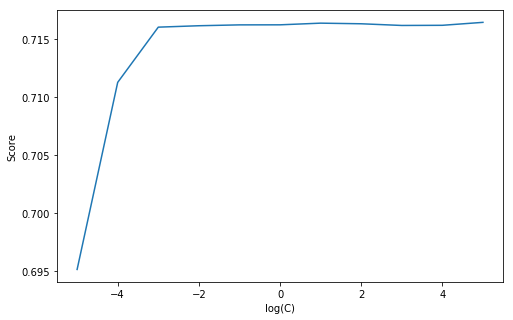

In [163]:
kf = KFold(n_splits=5, shuffle=True)
scores = []

for n in [10**i for i in range(-5, 6)]:
    print(f'C : {n}')
    model = LogisticRegression(C=n)
    start_time = datetime.datetime.now()
    score = cross_val_score(model, train_data_scaled, y_train, cv=kf, scoring='roc_auc')
    print('Time elapsed:', datetime.datetime.now() - start_time)
    scores.append(score.mean())
    print(f'{score}\nMean = {score.mean()}\n\n')
cn = [10**i for i in range(-5, 6)]
idx = scores.index(max(scores))
print(f'\nBest score = {max(scores)}\nC = {cn[idx]}\n')

plt.plot(range(-5, 6), scores)
plt.xlabel('log(C)')
plt.ylabel('Score')
plt.show()

### Убираем категориальные признаки

C : 1e-05
Time elapsed: 0:00:02.322237
[ 0.69188769  0.6948017   0.69954574  0.6965927   0.69241326]
Mean = 0.6950482169946882


C : 0.0001
Time elapsed: 0:00:03.910424
[ 0.7103432   0.71099805  0.71219704  0.7078637   0.7150571 ]
Mean = 0.7112918156515191


C : 0.001
Time elapsed: 0:00:06.680429
[ 0.71964846  0.71870775  0.7150544   0.71432835  0.7137567 ]
Mean = 0.7162991325103614


C : 0.01
Time elapsed: 0:00:08.304287
[ 0.71727741  0.71481501  0.71613822  0.71633751  0.7177192 ]
Mean = 0.7164574709552243


C : 0.1
Time elapsed: 0:00:09.138280
[ 0.71622022  0.71829457  0.71785614  0.71257682  0.71686156]
Mean = 0.7163618623625144


C : 1
Time elapsed: 0:00:10.007584
[ 0.71409615  0.71449922  0.71341117  0.72105019  0.7185161 ]
Mean = 0.7163145665997414


C : 10
Time elapsed: 0:00:10.645114
[ 0.71698912  0.71894684  0.7137775   0.71711232  0.71562937]
Mean = 0.7164910309804359


C : 100
Time elapsed: 0:00:11.324843
[ 0.71701123  0.72251163  0.71136678  0.71521033  0.71602568]
Mean = 

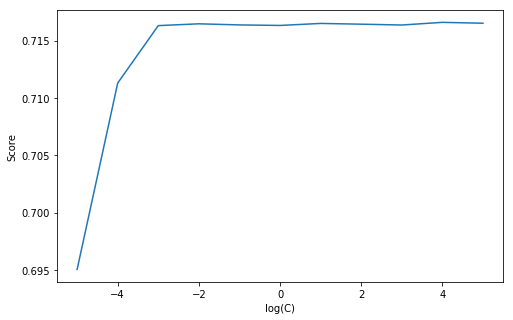

In [164]:
train_data_scaled = train_data.drop(['lobby_type'] + [f'{team}{i}_hero' for team in ['r', 'd'] for i in range(1, 6)], 
                                    axis=1)
scaler = StandardScaler()
names = train_data_scaled.columns
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data_scaled), columns=names)

scores = []
kf = KFold(n_splits=5, shuffle=True)

for n in [10**i for i in range(-5, 6)]:
    print(f'C : {n}')
    model = LogisticRegression(C=n)
    start_time = datetime.datetime.now()
    score = cross_val_score(model, train_data_scaled, y_train, cv=kf, scoring='roc_auc')
    print('Time elapsed:', datetime.datetime.now() - start_time)
    scores.append(score.mean())
    print(f'{score}\nMean = {score.mean()}\n\n')
cn = [10**i for i in range(-5, 6)]
idx = scores.index(max(scores))
print(f'\nBest score = {max(scores)}\nC = {cn[idx]}\n')

plt.plot(range(-5, 6), scores)
plt.xlabel('log(C)')
plt.ylabel('Score')
plt.show()

### Мешок слов для героев

In [165]:
unique_heroes_train = set(np.unique(train_data[[f'{team}{i}_hero' for team in ['r', 'd'] for i in range(1, 6)]]))
unique_heroes_test = set(np.unique(test_data[[f'{team}{i}_hero' for team in ['r', 'd'] for i in range(1, 6)]]))
print('Уникальных героев в тренировочной выборке:', len(unique_heroes_train))
print('Уникальных героев в тестовой выборке:', len(unique_heroes_test))
print('Всего уникальных героев по выборкам: ', len(unique_heroes_train & unique_heroes_test))
heroes = pd.read_csv('data/data/dictionaries/heroes.csv', index_col='id')
all_unique_heroes = len(heroes.index.unique())
print('Уникальных героев в файле с описанием: ', all_unique_heroes)

Уникальных героев в тренировочной выборке: 108
Уникальных героев в тестовой выборке: 108
Всего уникальных героев по выборкам:  108
Уникальных героев в файле с описанием:  112


In [166]:
X_pick = np.zeros((train_data.shape[0], all_unique_heroes))

for i, match_id in enumerate(train_data.index):
    for p in range(5):
        X_pick[i, train_data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, train_data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
train_data_scaled_and_heroes = train_data.drop(['lobby_type'] + [f'{team}{i}_hero'
                                                for team in ['r', 'd'] for i in range(1, 6)], 
                                                axis=1)
scaler = StandardScaler()
names = train_data_scaled_and_heroes.columns
train_data_scaled_and_heroes = pd.DataFrame(scaler.fit_transform(train_data_scaled_and_heroes), columns=names)
tmp_df = pd.DataFrame(X_pick, index=train_data_scaled_and_heroes.index,
             columns=[f'hero_{i + 1}' for i in range(all_unique_heroes)])
train_data_scaled_and_heroes = pd.concat([tmp_df, train_data_scaled_and_heroes], axis=1)

C : 1e-05
Time elapsed: 0:00:03.305751
[ 0.69861486  0.7007423   0.70228197  0.69763731  0.69636792]
Mean = 0.6991288713961265


C : 0.0001
Time elapsed: 0:00:05.298309
[ 0.72874221  0.72366121  0.72405013  0.72742439  0.72055803]
Mean = 0.7248871942730325


C : 0.001
Time elapsed: 0:00:10.488509
[ 0.7449404   0.74302945  0.748776    0.74722113  0.74726088]
Mean = 0.7462455720925887


C : 0.01
Time elapsed: 0:00:19.231237
[ 0.74877157  0.75490642  0.75112212  0.75057618  0.75318394]
Mean = 0.7517120475183674


C : 0.1
Time elapsed: 0:00:22.775405
[ 0.7512843   0.75374361  0.75151398  0.751388    0.75102439]
Mean = 0.7517908551735701


C : 1
Time elapsed: 0:00:27.963317
[ 0.75311673  0.75250883  0.75128379  0.74852875  0.75400603]
Mean = 0.7518888276300675


C : 10
Time elapsed: 0:00:22.622136
[ 0.74592481  0.75197307  0.75509403  0.75304911  0.7523796 ]
Mean = 0.7516841217867739


C : 100
Time elapsed: 0:00:21.008461
[ 0.74791689  0.75436787  0.75211574  0.75263787  0.7527567 ]
Mean = 

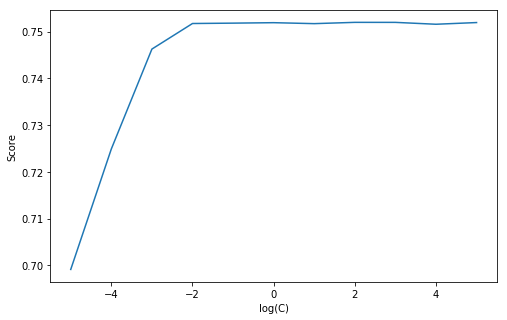

In [167]:
scores = []
kf = KFold(n_splits=5, shuffle=True)

for n in [10**i for i in range(-5, 6)]:
    print(f'C : {n}')
    model = LogisticRegression(C=n)
    start_time = datetime.datetime.now()
    score = cross_val_score(model, train_data_scaled_and_heroes, y_train, cv=kf, scoring='roc_auc')
    print('Time elapsed:', datetime.datetime.now() - start_time)
    scores.append(score.mean())
    print(f'{score}\nMean = {score.mean()}\n\n')
cn = [10**i for i in range(-5, 6)]
idx = scores.index(max(scores))
print(f'\nBest score = {max(scores)}\nC = {cn[idx]}\n')
idx = scores.index(min(scores))
print(f'\nWorst score = {min(scores)}\nC = {cn[idx]}\n')

plt.plot(range(-5, 6), scores)
plt.xlabel('log(C)')
plt.ylabel('Score')
plt.show()

In [168]:
X_pick = np.zeros((test_data.shape[0], all_unique_heroes))

for i, match_id in enumerate(test_data.index):
    for p in range(5):
        X_pick[i, test_data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, test_data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
test_data_scaled_and_heroes = test_data.drop(['lobby_type'] + [f'{team}{i}_hero'
                                        for team in ['r', 'd'] for i in range(1, 6)], 
                                        axis=1)
names = test_data_scaled_and_heroes.columns
test_data_scaled_and_heroes = pd.DataFrame(scaler.transform(test_data_scaled_and_heroes), columns=names)
tmp_df = pd.DataFrame(X_pick, index=test_data_scaled_and_heroes.index,
             columns=[f'hero_{i + 1}' for i in range(all_unique_heroes)])
test_data_scaled_and_heroes = pd.concat([tmp_df, test_data_scaled_and_heroes], axis=1)

In [171]:
model = LogisticRegression(C=100)
model.fit(train_data_scaled_and_heroes, y_train)
pred = model.predict_proba(test_data_scaled_and_heroes)[:, 1]

In [172]:
more_than_0 = (0 <= pred).any()
less_than_1 = (pred <= 1).any()

if more_than_0 and less_than_1:
    print('pred in [0; 1]')
else:
    print('pred not in [0, 1]')

pred in [0; 1]
